<a href="https://colab.research.google.com/github/Zainab0325/CodSoft-Tasks/blob/main/T5%7CCodSoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CODSOFT TASK 5***

***CREDITCARD FRAUD DETECTION***

IMPORTING REQUIRED LIBRARAIES

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
pd.set_option('display.max_column',None)

READING THE DATSET


In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.shape

(249556, 31)

In [ ]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

DATA PREPROCESSING

In [ ]:
#checking for imbalance
fraud_count = data['Class'].value_counts()
fraud_rate = 100*fraud_count/data.shape[0]
fraud_data = pd.concat([fraud_count,fraud_rate],axis = 1).reset_index()
fraud_data.columns = ['Class','Count','Percentage']
fraud_data

,Class,Count,Percentage
0,0.0,249100,99.817275
1,1.0,455,0.182324


In [ ]:
#handling imbalance
data_fraud = data[data['Class']==1]
data_not_fraud = data[data['Class']==0]
data_not_fraud_sampled = data_not_fraud.sample(data_fraud.shape[0],replace=False,random_state = 101)
data_balanced = pd.concat([data_not_fraud_sampled,data_fraud],axis=0).sample(frac=1,replace=False, random_state=101).reset_index().drop('index',axis=1)
data_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,43369.0,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,-4.980928,3.657882,-6.409822,-1.087310,-8.509433,1.432572,-5.369890,-9.069079,-2.819807,0.874543,-0.036837,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,88.00,1.0
1,51759.0,-0.317562,1.113182,1.141654,-0.020483,0.195361,-0.780896,0.698731,-0.045195,-0.356888,-0.508597,-0.548047,-0.245584,0.090769,-0.432814,0.930045,0.491498,-0.116943,-0.010266,0.044809,0.120810,-0.288085,-0.762829,-0.057040,-0.028553,-0.115505,0.094451,0.244410,0.094511,3.59,0.0
2,117086.0,-1.024182,0.754070,1.454557,-0.414826,0.448425,-0.622969,0.935239,-0.340048,0.343889,-0.282384,-0.946402,-0.455332,-0.575921,-0.155302,0.547964,-0.645562,-0.252442,0.255791,0.226746,0.050660,0.264232,1.183294,-0.637262,0.046549,1.028471,0.199749,-0.114308,-0.107616,14.22,0.0
3,48810.0,-1.232802,2.080297,0.616059,2.399681,-0.022890,0.706973,-0.270722,1.115081,-1.769350,0.877630,-0.099287,0.186147,0.352393,0.959598,0.609698,0.782381,-0.367535,0.835928,1.541101,0.226510,-0.166550,-0.630093,-0.039588,-0.874452,-0.188920,0.023600,0.234212,0.108343,7.21,0.0
4,43778.0,-10.630486,-6.172517,-0.675140,2.782845,1.212687,0.687526,2.151408,-2.566697,4.317813,5.422136,2.423719,0.297878,-0.054913,-3.101630,1.137167,-0.833197,-0.621449,-1.264595,1.748837,-6.717544,-2.675624,1.602777,1.450916,0.013311,0.587083,-0.319888,-3.106172,3.417477,123.30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,41227.0,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,-13.215172,6.895181,-13.279700,0.755264,-13.417012,-0.210774,-10.922655,-21.906493,-8.829820,1.852467,-0.645394,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,459.07,1.0
906,132688.0,0.432554,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,-2.314747,2.222960,-0.407550,-1.652312,-5.871438,-0.427647,1.679873,5.540865,3.207637,-0.559480,0.318853,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1.00,1.0
907,154255.0,-1.256025,1.753882,1.402070,0.366780,0.547426,0.779534,0.453295,0.250023,0.164285,0.555038,-1.260607,0.268541,1.317357,-0.552032,0.893352,-0.075391,-0.553691,0.094412,0.776738,0.680123,-0.357358,-0.638934,-0.267875,-0.019037,0.619903,-0.617829,0.679342,0.330353,1.00,0.0
908,26961.0,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,-8.511767,5.138547,-7.220020,0.615793,-7.327222,-0.038632,-6.331515,-12.688858,-4.847382,1.020536,1.630787,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99,1.0


In [ ]:
print('Fraudulent Cases: {}'.format(len(data[data['Class']==1])))
print('Non Fraudulent Cases: {}'.format(len(data[data['Class']==0])))
outlierFraction = len(data_fraud)/float(len(data_not_fraud))
print('There are only {}'.format(outlierFraction) + ' fraudulent transactions')

Fraudulent Cases: 455
Non Fraudulent Cases: 249100
There are only 0.0018265756724207146 fraudulent transactions


In [ ]:
#checking imbalance  again
fraud_count = data_balanced['Class'].value_counts()
fraud_rate = 100*fraud_count/ data_balanced.shape[0]
fraud_data = pd.concat([fraud_count,fraud_rate],axis = 1).reset_index()
fraud_data.columns = ['Class','Count','Percentage']
fraud_data

,Class,Count,Percentage
0,1.0,455,50.0
1,0.0,455,50.0


In [ ]:
#train-test spliting
x_train, x_test, y_train, y_test = train_test_split( data_balanced.drop('Class',axis=1), data_balanced['Class'],test_size=0.2,random_state=101)
print(f'''x_train: {x_train.shape}
x_test: {x_test.shape}
y_train: {y_train.shape}
y_test : {y_test.shape}''')

x_train: (728, 30)
x_test: (182, 30)
y_train: (728,)
y_test : (182,)


CLASSIFICATION USING RANDOM FOREST MODEL

In [ ]:
#logistic model pipe
randomForestModel = Pipeline([('scaler',StandardScaler()),
                              ('classifier',RandomForestClassifier())])
randomForestModel.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [ ]:
#predictions
y_pred = randomForestModel.predict(x_test)
y_pred

array([0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.])

EXPLORATORY DATA ANALYSIS


<Axes: >

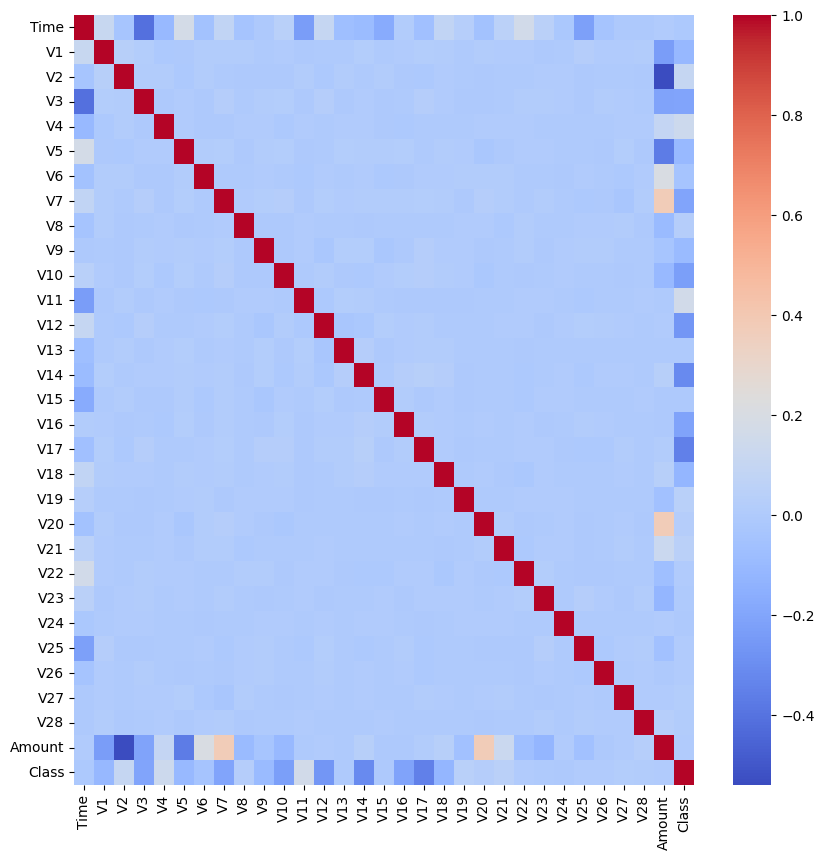

In [ ]:
# CORRELATION MATRIX
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=False,cmap='coolwarm')

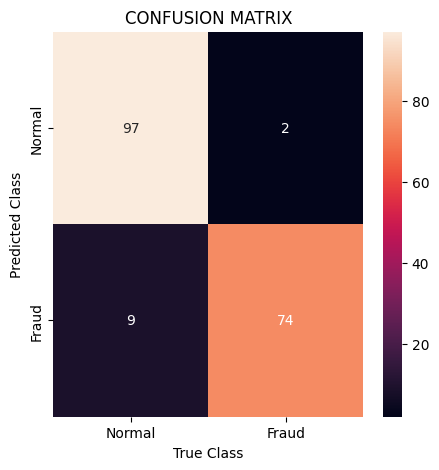

In [ ]:
# CONFUSION MATRIX
label= ['Normal','Fraud']
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, xticklabels = label, yticklabels=label, annot = True, fmt="d")
plt.title('CONFUSION MATRIX')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

EVALUATING MODEL PERFORMANCE

In [ ]:
#classification Report
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        99
         1.0       0.97      0.89      0.93        83

    accuracy                           0.94       182
   macro avg       0.94      0.94      0.94       182
weighted avg       0.94      0.94      0.94       182

